In [1]:
import pandas as pd
import ast
import json
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
sns.set(rc={'figure.figsize':(12,12)})

In [2]:
df_b = pd.read_json('business.json', lines=True)

In [3]:


df_b


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [4]:
df_b = df_b[df_b['is_open']==1] 

In [5]:

df_b["state"].value_counts()

PA     26289
FL     21540
TN      9600
IN      8946
MO      8363
AZ      8108
LA      7676
NJ      7031
NV      6277
AB      4346
CA      4065
ID      3783
DE      1894
IL      1765
TX         4
WA         2
MA         2
UT         1
HI         1
CO         1
VT         1
SD         1
MI         1
XMS        1
Name: state, dtype: int64

In [6]:
business_list = list(df_b["categories"])

In [8]:
business_set = []
for i in business_list:
    if i:
        business_set.extend(i.split(", "))
pd.Series(business_set).value_counts()[:50]

Restaurants                  34987
Food                         20419
Shopping                     20186
Home Services                13322
Beauty & Spas                12263
Health & Medical             11046
Local Services               10138
Automotive                    9879
Nightlife                     8379
Event Planning & Services     8173
Bars                          7528
Active Life                   6496
Sandwiches                    6075
American (Traditional)        5531
Fast Food                     5516
Hotels & Travel               5123
Pizza                         5090
Home & Garden                 5022
Auto Repair                   5003
Coffee & Tea                  4954
Fashion                       4432
Breakfast & Brunch            4415
Arts & Entertainment          4370
Burgers                       4275
Hair Salons                   4185
Nail Salons                   4047
American (New)                3629
Doctors                       3556
Pets                

In [11]:

coffee = df_b[df_b.categories.str.contains('Coffee & Tea',case=True,na=False)& (df_b['state'] == 'PA')]
coffee

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
205,2dlQX5sP9X6Dlm1MmNOlSw,ReAnimator Coffee,1523 E Susquehanna Ave,Philadelphia,PA,19125,39.976456,-75.127025,4.0,105,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', '..."
235,bTve2mwLk5Zc01vRKqc2KQ,Red Hook Coffee & Tea,765 S 4th St,Philadelphia,PA,19147,39.938552,-75.149636,4.5,183,1,"{'BikeParking': 'True', 'OutdoorSeating': 'Tru...","Restaurants, Breakfast & Brunch, Vegan, Bagels...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
361,aNXw3PkXVt8ANwLyCfcmpg,McDonald's,2333 Welsh Rd,Lansdale,PA,19446,40.263706,-75.317916,1.5,17,1,"{'WiFi': 'u'free'', 'GoodForKids': 'True', 'Bu...","Restaurants, Fast Food, Burgers, Food, Coffee ...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149805,q0tB0ch5cFQQBSp5nUXRCQ,Wawa,10901 Bustleton Ave,Philadelphia,PA,19116,40.111571,-75.023489,3.5,12,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Food, Convenience Stores, Sandwiches, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
149824,VFrmNGmPK-8UsDAXlxX-CQ,Starbucks,270 Easton Rd,Warrington,PA,18976,40.220144,-75.140597,3.0,32,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '5:30-20:30',..."
149895,tpo4IsLJDU5agU2TjLO-jw,Brakeman's Cafe,56 S Washington St,Boyertown,PA,19512,40.331233,-75.635736,4.5,31,1,"{'OutdoorSeating': 'True', 'HasTV': 'False', '...","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-14:0', '..."
150123,pM1M2A14mNXz48KCcQtz2w,Starbucks,4140 Woodland Ave,Philadelphia,PA,19104,39.946809,-75.206722,3.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '7:0-23:0', '..."


In [12]:


coffee = coffee.loc[~(pd.isna(coffee["attributes"])), :] 
coffee = coffee.loc[~(pd.isna(coffee["stars"])), :]

coffee

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
205,2dlQX5sP9X6Dlm1MmNOlSw,ReAnimator Coffee,1523 E Susquehanna Ave,Philadelphia,PA,19125,39.976456,-75.127025,4.0,105,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', '..."
235,bTve2mwLk5Zc01vRKqc2KQ,Red Hook Coffee & Tea,765 S 4th St,Philadelphia,PA,19147,39.938552,-75.149636,4.5,183,1,"{'BikeParking': 'True', 'OutdoorSeating': 'Tru...","Restaurants, Breakfast & Brunch, Vegan, Bagels...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
361,aNXw3PkXVt8ANwLyCfcmpg,McDonald's,2333 Welsh Rd,Lansdale,PA,19446,40.263706,-75.317916,1.5,17,1,"{'WiFi': 'u'free'', 'GoodForKids': 'True', 'Bu...","Restaurants, Fast Food, Burgers, Food, Coffee ...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149805,q0tB0ch5cFQQBSp5nUXRCQ,Wawa,10901 Bustleton Ave,Philadelphia,PA,19116,40.111571,-75.023489,3.5,12,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Food, Convenience Stores, Sandwiches, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
149824,VFrmNGmPK-8UsDAXlxX-CQ,Starbucks,270 Easton Rd,Warrington,PA,18976,40.220144,-75.140597,3.0,32,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '5:30-20:30',..."
149895,tpo4IsLJDU5agU2TjLO-jw,Brakeman's Cafe,56 S Washington St,Boyertown,PA,19512,40.331233,-75.635736,4.5,31,1,"{'OutdoorSeating': 'True', 'HasTV': 'False', '...","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-14:0', '..."
150123,pM1M2A14mNXz48KCcQtz2w,Starbucks,4140 Woodland Ave,Philadelphia,PA,19104,39.946809,-75.206722,3.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '7:0-23:0', '..."


In [13]:
coffee[["attributes"]].iloc[0,0]

{'RestaurantsDelivery': 'False',
 'OutdoorSeating': 'False',
 'BusinessAcceptsCreditCards': 'False',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
 'BikeParking': 'True',
 'RestaurantsPriceRange2': '1',
 'RestaurantsTakeOut': 'True',
 'ByAppointmentOnly': 'False',
 'WiFi': "u'free'",
 'Alcohol': "u'none'",
 'Caters': 'True'}

In [14]:
attributesl = []
for attribute in coffee["attributes"]:
    attributesl.extend(attribute.keys())
attr = pd.Series(attributesl).value_counts().to_dict()
attr

{'RestaurantsTakeOut': 1153,
 'BusinessParking': 1104,
 'BusinessAcceptsCreditCards': 1094,
 'WiFi': 1034,
 'RestaurantsPriceRange2': 1027,
 'RestaurantsDelivery': 1021,
 'BikeParking': 905,
 'OutdoorSeating': 894,
 'Caters': 686,
 'HasTV': 500,
 'Ambience': 492,
 'RestaurantsReservations': 492,
 'GoodForKids': 476,
 'Alcohol': 463,
 'RestaurantsGoodForGroups': 447,
 'NoiseLevel': 441,
 'RestaurantsAttire': 399,
 'GoodForMeal': 374,
 'DriveThru': 352,
 'WheelchairAccessible': 282,
 'DogsAllowed': 251,
 'RestaurantsTableService': 234,
 'BusinessAcceptsBitcoin': 139,
 'HappyHour': 134,
 'ByAppointmentOnly': 99,
 'BYOB': 62,
 'Corkage': 62,
 'BYOBCorkage': 20,
 'Music': 18,
 'GoodForDancing': 14,
 'CoatCheck': 13,
 'BestNights': 13,
 'Smoking': 13,
 'AgesAllowed': 5,
 'DietaryRestrictions': 1,
 'AcceptsInsurance': 1}

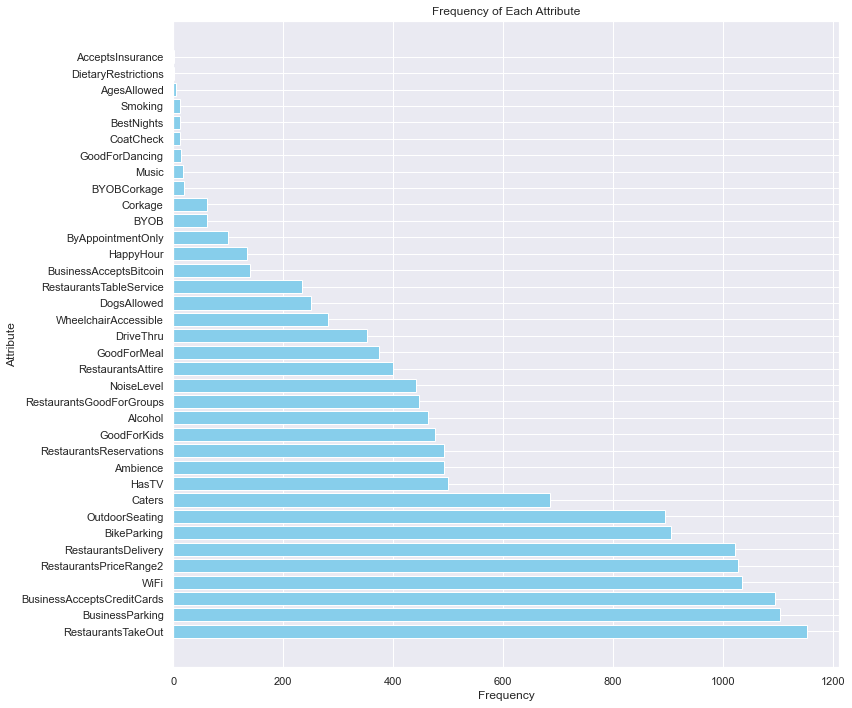

In [15]:

keys = list(attr.keys())
values = list(attr.values())

# Create a horizontal bar plot
plt.figure(figsize=(12, 10))
plt.barh(keys, values, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Attribute')
plt.title('Frequency of Each Attribute')
plt.tight_layout()
plt.show()

In [25]:
len(attr)

38

In [16]:
attr_select = [i for (i,j) in attr.items() if j >=200]
attr_select

['RestaurantsTakeOut',
 'BusinessParking',
 'BusinessAcceptsCreditCards',
 'WiFi',
 'RestaurantsPriceRange2',
 'RestaurantsDelivery',
 'BikeParking',
 'OutdoorSeating',
 'Caters',
 'HasTV',
 'Ambience',
 'RestaurantsReservations',
 'GoodForKids',
 'Alcohol',
 'RestaurantsGoodForGroups',
 'NoiseLevel',
 'RestaurantsAttire',
 'GoodForMeal',
 'DriveThru',
 'WheelchairAccessible',
 'DogsAllowed',
 'RestaurantsTableService']

Transform into DataFrame

In [17]:
dfattr = pd.json_normalize(coffee['attributes'])
dfattr = dfattr[attr_select] 

In [18]:
dfattr["business_id"] = coffee['business_id'].values 
dfattr["stars"] = coffee['stars'].values 

dfattr

,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,WiFi,RestaurantsPriceRange2,RestaurantsDelivery,BikeParking,OutdoorSeating,Caters,HasTV,...,RestaurantsGoodForGroups,NoiseLevel,RestaurantsAttire,GoodForMeal,DriveThru,WheelchairAccessible,DogsAllowed,RestaurantsTableService,business_id,stars
0,True,"{'garage': False, 'street': True, 'validated':...",False,u'free',1,False,True,False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MTSW4McQd7CbVtyjqoe9mw,4.0
1,True,"{'garage': False, 'street': True, 'validated':...",True,u'free',1,True,True,False,False,True,...,True,u'average',u'casual',NaN,NaN,NaN,NaN,NaN,ppFCk9aQkM338Rgwpl2F5A,3.0
2,True,"{'garage': False, 'street': True, 'validated':...",True,u'free',1,False,True,True,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2dlQX5sP9X6Dlm1MmNOlSw,4.0
3,True,"{'garage': False, 'street': True, 'validated':...",False,'free',1,False,True,True,False,True,...,False,u'quiet','casual',"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,bTve2mwLk5Zc01vRKqc2KQ,4.5
4,True,"{'garage': False, 'street': False, 'validated'...",NaN,u'free',1,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,aNXw3PkXVt8ANwLyCfcmpg,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,True,"{'garage': False, 'street': False, 'validated'...",True,u'free',1,True,False,NaN,True,True,...,NaN,NaN,NaN,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,q0tB0ch5cFQQBSp5nUXRCQ,3.5
1212,True,"{'garage': False, 'street': False, 'validated'...",True,'free',2,False,True,True,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VFrmNGmPK-8UsDAXlxX-CQ,3.0
1213,True,"{'garage': False, 'street': True, 'validated':...",True,u'free',NaN,True,True,True,True,False,...,NaN,NaN,NaN,NaN,NaN,True,True,True,tpo4IsLJDU5agU2TjLO-jw,4.5
1214,False,"{'garage': None, 'street': True, 'validated': ...",True,u'free',2,False,True,False,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,pM1M2A14mNXz48KCcQtz2w,3.0


In [19]:
dfattr.dtypes

RestaurantsTakeOut             object
BusinessParking                object
BusinessAcceptsCreditCards     object
WiFi                           object
RestaurantsPriceRange2         object
RestaurantsDelivery            object
BikeParking                    object
OutdoorSeating                 object
Caters                         object
HasTV                          object
Ambience                       object
RestaurantsReservations        object
GoodForKids                    object
Alcohol                        object
RestaurantsGoodForGroups       object
NoiseLevel                     object
RestaurantsAttire              object
GoodForMeal                    object
DriveThru                      object
WheelchairAccessible           object
DogsAllowed                    object
RestaurantsTableService        object
business_id                    object
stars                         float64
dtype: object

In [20]:
object_columns = dfattr.select_dtypes(include=['object']).columns

# Display unique values count for each object column
for col in object_columns:
    unique_values_count = dfattr[col].nunique()
    print(f"Column '{col}' has {unique_values_count} unique values:")
    print(dfattr[col].value_counts())
    print("\n")

Column 'RestaurantsTakeOut' has 3 unique values:
True     1105
False      32
None       16
Name: RestaurantsTakeOut, dtype: int64


Column 'BusinessParking' has 73 unique values:
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}        335
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}        259
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}       225
{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}          61
{'garage': True, 'street': True, 'validated': False, 'lot': False, 'valet': False}          15
                                                                                          ... 
{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': True}           1
{'garage': False, 'street': True, 'validated': True, 'lot': False, 'valet': True}            1
{u'valet': False, u'garage': False, u'street': None, u'lot': 

Process Business Parking 

In [21]:
dfattr['BusinessParking_parsed'] = dfattr['BusinessParking'].apply(lambda x: ast.literal_eval(str(x)) if isinstance(x, str) else np.nan)

In [22]:
dfattr = pd.merge(dfattr, dfattr['BusinessParking_parsed'].apply(pd.Series), left_index=True, right_index=True)
dfattr.drop(['BusinessParking', 'BusinessParking_parsed', 0], axis=1, inplace=True)
dfattr #BusinessParking 5 types

,RestaurantsTakeOut,BusinessAcceptsCreditCards,WiFi,RestaurantsPriceRange2,RestaurantsDelivery,BikeParking,OutdoorSeating,Caters,HasTV,Ambience,...,WheelchairAccessible,DogsAllowed,RestaurantsTableService,business_id,stars,garage,lot,street,valet,validated
0,True,False,u'free',1,False,True,False,True,NaN,NaN,...,NaN,NaN,NaN,MTSW4McQd7CbVtyjqoe9mw,4.0,False,False,True,False,False
1,True,True,u'free',1,True,True,False,False,True,"{'romantic': False, 'intimate': False, 'classy...",...,NaN,NaN,NaN,ppFCk9aQkM338Rgwpl2F5A,3.0,False,False,True,False,False
2,True,True,u'free',1,False,True,True,False,NaN,NaN,...,NaN,NaN,NaN,2dlQX5sP9X6Dlm1MmNOlSw,4.0,False,False,True,False,False
3,True,False,'free',1,False,True,True,False,True,"{'romantic': False, 'intimate': False, 'classy...",...,NaN,NaN,NaN,bTve2mwLk5Zc01vRKqc2KQ,4.5,False,False,True,False,False
4,True,NaN,u'free',1,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,aNXw3PkXVt8ANwLyCfcmpg,1.5,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,True,True,u'free',1,True,False,NaN,True,True,"{'touristy': False, 'hipster': False, 'romanti...",...,NaN,NaN,NaN,q0tB0ch5cFQQBSp5nUXRCQ,3.5,False,True,False,False,False
1212,True,True,'free',2,False,True,True,False,NaN,NaN,...,NaN,NaN,NaN,VFrmNGmPK-8UsDAXlxX-CQ,3.0,False,True,False,False,False
1213,True,True,u'free',NaN,True,True,True,True,False,NaN,...,True,True,True,tpo4IsLJDU5agU2TjLO-jw,4.5,False,False,True,False,False
1214,False,True,u'free',2,False,True,False,NaN,NaN,NaN,...,NaN,NaN,NaN,pM1M2A14mNXz48KCcQtz2w,3.0,None,None,True,False,False


In [23]:
BP = dfattr.loc[~(pd.isna(dfattr["garage"])), :]
BP = BP.loc[~(pd.isna(BP["street"])), :]
BP = BP.loc[~(pd.isna(BP["validated"])), :]
BP = BP.loc[~(pd.isna(BP["lot"])), :]
BP = BP.loc[~(pd.isna(BP["valet"])), :]

BP['garage'] = BP['garage'].replace([True], "True").replace([False], "False")
BP['street'] = BP['street'].replace([True], "True").replace([False], "False")
BP['validated'] = BP['validated'].replace([True], "True").replace([False], "False")
BP['lot'] = BP['lot'].replace([True], "True").replace([False], "False")
BP['valet'] = BP['valet'].replace([True], "True").replace([False], "False")

In [24]:
BP

,RestaurantsTakeOut,BusinessAcceptsCreditCards,WiFi,RestaurantsPriceRange2,RestaurantsDelivery,BikeParking,OutdoorSeating,Caters,HasTV,Ambience,...,WheelchairAccessible,DogsAllowed,RestaurantsTableService,business_id,stars,garage,lot,street,valet,validated
0,True,False,u'free',1,False,True,False,True,NaN,NaN,...,NaN,NaN,NaN,MTSW4McQd7CbVtyjqoe9mw,4.0,False,False,True,False,False
1,True,True,u'free',1,True,True,False,False,True,"{'romantic': False, 'intimate': False, 'classy...",...,NaN,NaN,NaN,ppFCk9aQkM338Rgwpl2F5A,3.0,False,False,True,False,False
2,True,True,u'free',1,False,True,True,False,NaN,NaN,...,NaN,NaN,NaN,2dlQX5sP9X6Dlm1MmNOlSw,4.0,False,False,True,False,False
3,True,False,'free',1,False,True,True,False,True,"{'romantic': False, 'intimate': False, 'classy...",...,NaN,NaN,NaN,bTve2mwLk5Zc01vRKqc2KQ,4.5,False,False,True,False,False
4,True,NaN,u'free',1,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,aNXw3PkXVt8ANwLyCfcmpg,1.5,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,True,NaN,u'free',NaN,NaN,NaN,NaN,NaN,True,"{'touristy': False, 'hipster': False, 'romanti...",...,NaN,NaN,NaN,mx31XU-QJIxObRGH_qvy3w,4.5,False,False,False,False,False
1211,True,True,u'free',1,True,False,NaN,True,True,"{'touristy': False, 'hipster': False, 'romanti...",...,NaN,NaN,NaN,q0tB0ch5cFQQBSp5nUXRCQ,3.5,False,True,False,False,False
1212,True,True,'free',2,False,True,True,False,NaN,NaN,...,NaN,NaN,NaN,VFrmNGmPK-8UsDAXlxX-CQ,3.0,False,True,False,False,False
1213,True,True,u'free',NaN,True,True,True,True,False,NaN,...,True,True,True,tpo4IsLJDU5agU2TjLO-jw,4.5,False,False,True,False,False


ANOVA for attributes

In [25]:
#business parking
BP_types = ["garage", "validated", "street","lot", "valet"]
BPresult = []

for i in BP_types:
    result = stats.f_oneway(BP['stars'][BP[i] == 'False'], 
                            BP['stars'][BP[i] == 'True'])
    BPresult.append(result)

In [26]:
BPresult

[F_onewayResult(statistic=5.729915247097145, pvalue=0.016871015197886),
 F_onewayResult(statistic=3.799354018444408, pvalue=0.05156573655427923),
 F_onewayResult(statistic=294.4135582241184, pvalue=1.048086324312293e-57),
 F_onewayResult(statistic=15.87403991423686, pvalue=7.286753710345541e-05),
 F_onewayResult(statistic=1.0241068933001636, pvalue=0.3118039490936837)]

In [27]:
#for true/false attributes

TF = ['RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery','OutdoorSeating',
                 'BikeParking','Caters', 'HasTV', 'GoodForKids', 'RestaurantsReservations', 
                     'RestaurantsGoodForGroups','DriveThru','WheelchairAccessible','DogsAllowed','RestaurantsTableService']
TF_outcome = []

for i in TF:
    outcome = stats.f_oneway(dfattr['stars'][dfattr[i] == 'False'], 
                            dfattr['stars'][dfattr[i] == 'True'])
    TF_outcome.append(outcome)


In [28]:
TF_outcome

[F_onewayResult(statistic=7.128592343297785, pvalue=0.007694769398118893),
 F_onewayResult(statistic=23.519175842329386, pvalue=1.4161490973271404e-06),
 F_onewayResult(statistic=98.24286689368046, pvalue=3.9151306902379884e-22),
 F_onewayResult(statistic=125.19130585277517, pvalue=3.336778195251376e-27),
 F_onewayResult(statistic=52.55765794422336, pvalue=8.980162588599968e-13),
 F_onewayResult(statistic=62.24886815092835, pvalue=1.2088916350085998e-14),
 F_onewayResult(statistic=101.10524741830218, pvalue=8.85365364996806e-22),
 F_onewayResult(statistic=0.08653640097783442, pvalue=0.7687562433131113),
 F_onewayResult(statistic=18.145511331775275, pvalue=2.454495232412963e-05),
 F_onewayResult(statistic=5.62843911718515, pvalue=0.018095630236292164),
 F_onewayResult(statistic=136.6460207025283, pvalue=1.872565739779727e-22),
 F_onewayResult(statistic=25.353001356035044, pvalue=8.56190218189192e-07),
 F_onewayResult(statistic=14.149165936090395, pvalue=0.00021057474425239134),
 F_onewa

In [32]:
wifi = stats.f_oneway(dfattr['stars'][dfattr["WiFi"] == "u'free'"], dfattr['stars'][dfattr["WiFi"] == "'free'"],
                        dfattr['stars'][dfattr["WiFi"] == "u'no'"], dfattr['stars'][dfattr["WiFi"] == "'no'"],
                     dfattr['stars'][dfattr["WiFi"] == "'paid'"])
wifi 

F_onewayResult(statistic=20.52009525715276, pvalue=2.7759571079297935e-16)

In [30]:


price_range = stats.f_oneway(dfattr['stars'][dfattr["RestaurantsPriceRange2"] == '1'], dfattr['stars'][dfattr["RestaurantsPriceRange2"] == '2'],
                        dfattr['stars'][dfattr["RestaurantsPriceRange2"] == '3'], dfattr['stars'][dfattr["RestaurantsPriceRange2"] == '4'])
price_range 

F_onewayResult(statistic=34.84881112285013, pvalue=1.903244433676764e-21)

In [31]:
noise = stats.f_oneway(dfattr['stars'][dfattr["NoiseLevel"] == "u'average'"], dfattr['stars'][dfattr["NoiseLevel"] == "'average'"],
                        dfattr['stars'][dfattr["NoiseLevel"] == "u'quiet'"], dfattr['stars'][dfattr["NoiseLevel"] == "'quiet'"],
                     dfattr['stars'][dfattr["NoiseLevel"] == "u'loud'"],dfattr['stars'][dfattr["NoiseLevel"] == "'loud'"],
                      dfattr['stars'][dfattr["NoiseLevel"] == "u'very_loud'"],dfattr['stars'][dfattr["NoiseLevel"] == "'very_loud'"])
noise

F_onewayResult(statistic=9.818001298211355, pvalue=2.2367722265994792e-11)

In [7]:
reviews = pd.read_json('review.json', lines=True, orient='columns', chunksize=1000000)

In [12]:
for review in reviews:
    subset_review = review
    break

In [13]:
subset_review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
999995,t-2o35kr7Q9DSaeuKhaDuQ,oX7o1TH0PHUWp9r9ry9_vw,jLn69WQupjsDKrbPw_nlGQ,3,0,1,0,Never really had any issues here other than th...,2017-11-15 09:43:07
999996,fLIwWCvdul9PNWYfJt5QWA,v8wlapFKVLs2qTYCGhCdiw,t6v8g8UeNiq3O2GoEc7R4Q,4,0,0,0,Fish recently moved a couple of doors down the...,2014-09-03 18:27:33
999997,ETAiy6wEM-r9ve4SKDhBpg,rLlYc1RzIBnOmnX3AbpEYw,ZYRul0i1bhOjirHED6Kd0w,3,0,0,0,I've been to South House around a dozen or so ...,2016-02-20 22:25:29
999998,8OgvSXuc6KjAt2fSz9LuzA,eEH-8CEPU5ndPxDGzVfHiQ,onGXKwnxPLtKnO8yqQMPSA,1,1,0,1,Wow! I am shocked at these reviews. I have tri...,2010-06-27 02:17:30
